Other useful information about this notebook:

- Filename: `dissipation-theory--Study-37.ipynb`
- Continued from: `2023-09-21--jam99--20230811-ringdown--Study-1.ipynb`
- Continued to: ---

To make a nicely formatted html file 

    quarto render dissipation-theory--Study-37

# Preliminaries

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 3.25, 3.5

In [3]:
THIS = 'dissipation-theory--Study-37--'
figs = {}

# Read in $f_2$ data and plot

The csv file is a summary of data derived from a ringdown experiment over gold.  Read into a pandas dataframe the columns for height, cantilever frequency, and cantilever frequency standard deviation.

In [4]:
filename = '20230811-ringdown-Gold_data_summary.csv'

cols_list = \
['Distance from Surface [nm]', 
 'Curvature [Hz/V^2]',
 'Curvature std [Hz/V^2]']

data = pd.read_csv(filename, usecols=cols_list)

With the freqency shift depending on voltage as $\Delta f \equiv f_2 V^2$, call the coefficient $f_2$ or `f2` in the code below.

In [5]:
rename_dict = \
    {'Distance from Surface [nm]': 'h [nm]',
     'Curvature [Hz/V^2]': 'f2 [Hz/V^2]',
     'Curvature std [Hz/V^2]': 'stdev f2 [Hz/V^2]'}

data.rename(columns=rename_dict, inplace=True)
data

,h [nm],f2 [Hz/V^2],stdev f2 [Hz/V^2]
0,37.5,12.548678,0.503368
1,40.5,9.644799,0.253236
2,43.5,7.194810,0.201747
3,46.5,7.497982,0.170096
4,49.5,5.519482,0.012767
5,52.5,5.582289,0.071206
6,55.5,4.565261,0.060349
7,58.5,4.433819,0.056613
8,61.5,3.801423,0.029397
9,64.5,3.871571,0.048265


In [6]:
def plotdata(data):
    
    fig = plt.figure(figsize=(3.50, 3.00))
    
    plt.errorbar(
        data['h [nm]'], 
        data['f2 [Hz/V^2]'],
        yerr=data['stdev f2 [Hz/V^2]'],
        fmt='.')

    plt.xlabel('tip-sample separation $h$ [nm]')
    plt.ylabel('$f_2$ [Hz/V$^2$]' )
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()

    return fig

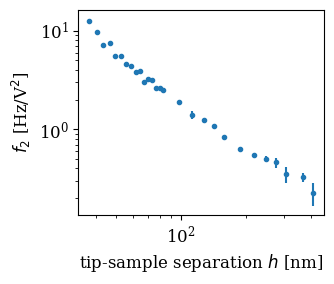

In [7]:
_ = plotdata(data)

# Compare measured $f_2$ to Loring's two spherical-tip models

In [8]:
from dissipationtheory.constants import ureg, epsilon0

Specify the cantilever parameters used in the fits below.

In [9]:
cantilever = {
    'f_0': ureg.Quantity(62, 'kHz'), # frequency [measured]
    'k_0': ureg.Quantity(2.8,'N/m')  # spring constant [mfgr spec]
}

A function that compute's Loring's formulas for the BLDS frequency shift over a metal.

In [10]:
def calcf2_Loring(data, R=35, cantilever=cantilever):

    r = ureg.Quantity(R, 'nm')
    h = ureg.Quantity(data['h [nm]'].values, 'nm')

    f_c = cantilever['f_0']
    k_c = cantilever['k_0']
    
    prefactor = -(np.pi * epsilon0 * f_c)/(2 * k_c)

    f2calc1 = np.abs(prefactor * r**2 /(h + r)**3).to('Hz/V^2').magnitude
    f2calc2 = np.abs(prefactor * r**2 /(h + r/2)**3).to('Hz/V^2').magnitude
        
    return R, f2calc1, f2calc2

In [11]:
def plotcalcf2(data, f2calc1, f2calc2, R1, R2, message=''):
    
    fig, ax = plt.subplots(figsize=(3.50, 3.50))
    
    ax.errorbar(
        data['h [nm]'], 
        data['f2 [Hz/V^2]'],
        yerr=data['stdev f2 [Hz/V^2]'],
        fmt='.')
    
    ax.plot(data['h [nm]'], f2calc1, 'b-', label=r'r = {:0.1f} nm'.format(R1))
    ax.plot(data['h [nm]'], f2calc2, 'b--', label=r'r = {:0.1f} nm'.format(R2))
    ax.fill_between(data['h [nm]'], f2calc1, f2calc2, alpha=0.1)

    plt.xlabel('tip-sample separation $h$ [nm]')
    plt.ylabel('$f_2$ [Hz/V$^2$]' )
    
    plt.xscale('log')
    plt.yscale('log')
    
    plt.legend(fontsize=9)
    plt.title(r"metal sample, $r_{\mathrm{tip}}$ indicated"
              "\n" + message, fontsize=10)    
    
    plt.tight_layout()

    return fig

The manufacturer-specified radius for the tip is $r \leq 30 \: \mathrm{nm}$.  Pick a lower-bound $r_{\mathrm{lower}} = 20 \: \mathrm{nm}$ and an upper-bound $r_{\mathrm{upper}} = 200 \: \mathrm{nm}$, ten times the lower bound. For this range of tip radii, Loring's linear-response treatment underestimates the frequency shift by a factor of 10 at small $h$ by a factor of 10 to 1000 at large $h$.

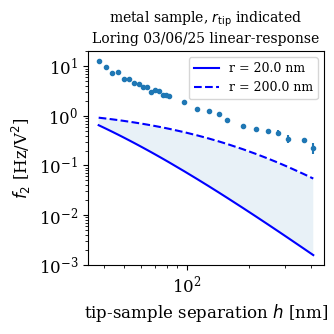

In [12]:
R1a, f2calc1a, _ = calcf2_Loring(data, R=20)
R1b, f2calc1b, _ = calcf2_Loring(data, R=200)

figs['01'] = plotcalcf2(
    data, f2calc1a, f2calc1b, R1a, R1b,
    message = r"Loring 03/06/25 linear-response")

For the same range of tip radii, Loring's nonperturbative treatment does better. At the largest tip radius, the calculated frequency curvature approaches the measured frequency curvature at mid-range $h$.  However, $200 \: \mathrm{nm}$ seems like an unphysically large tip radius.

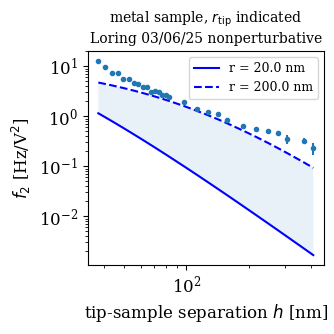

In [13]:
R2a, _, f2calc2a = calcf2_Loring(data, R=20)
R2b, _, f2calc2b = calcf2_Loring(data, R=200)

figs['02'] = plotcalcf2(
    data, f2calc2a, f2calc2b, R2a, R2b,
    message = r"Loring 03/06/25 nonperturbative")

# Compare measured $f_2$ to Hoepker's sphere-plus-cone model

In [14]:
from dissipationtheory.capacitance import Csphere
from lmfit import Model, Parameters

In [15]:
def C2SphereCone(height, radius, theta, nterm=21):  
    """Second derivative of the capacitance of a sphere plus a cone above a ground plane.

    :param pint.util.Quantity height: sphere-to-plane separation
    :param pint.util.Quantity radius: sphere radius
    :param pint.util.Quantity theta: cone angle
    :param int nterm: number of terms in the sphere expansion

    The cone appproximation is eq. 2.52 in Nikolas Hoepker's Ph.D. thesis.
    """
    
    theta_rad = theta.to('radian').magnitude
    beta = np.log((1 + np.cos(theta_rad))/(1 - np.cos(theta_rad)))
    
    C2sphere = Csphere(2, height, radius, nterm).to('F/m^2')
    C2cone = (8*np.pi*epsilon0/(beta * beta * height)).to('F/m^2')

    return C2sphere, C2cone 

Given height, tip radius, and tip cone angle, compute the frequency second derivative $f_2$ [Hz/V$^2$].

In [16]:
def calcf2(height, radius, theta, fit=True):
    """Second derivative of the cantilever frequency $f_2$ with respect to voltage.
    
    :param pint.util.Quantity array height: sphere-to-plane separation
    :param pint.util.Quantity radius: sphere radius
    :param pint.util.Quantity theta: cone angle
    :param Boolean fit: if True, return $f_2$; if False, return a triple of numbers, the 
     sphere contribution, the cone contribution, and the sum of the two contributions
    """

    prefactor = cantilever['f_0']/(4 * cantilever['k_0']) 

    C2sphere, C2cone = C2SphereCone(
         height = ureg.Quantity(height, 'nm'),
         radius = ureg.Quantity(radius, 'nm'),
         theta = ureg.Quantity(theta, 'degrees'))
        
    f2sphere = (prefactor * C2sphere).to('Hz/V^2').magnitude
    f2cone = (prefactor * C2cone).to('Hz/V^2').magnitude
    
    C2 = C2cone + C2sphere
    f2 = (prefactor * C2).to('Hz/V^2').magnitude
    
    
    if fit:
        return f2 
    else:
        return f2sphere, f2cone, f2
               

A function to plot the total frequency derivative and the separate sphere and cone contributions.

In [52]:
def plotfitf2parts(data, f2calc, message=''):

    fig = plt.figure(figsize=(3.50, 3.00))
    
    plt.errorbar(
        data['h [nm]'], 
        data['f2 [Hz/V^2]'],
        yerr=data['stdev f2 [Hz/V^2]'],
        fmt='.')
    
    plt.plot(data['h [nm]'], f2calc[0], 'k--', label='sphere')
    plt.plot(data['h [nm]'], f2calc[1], 'k-.', label='cone')
    plt.plot(data['h [nm]'], f2calc[2], 'k-', label='total')

    plt.xlabel('tip-sample separation $h$ [nm]')
    plt.ylabel('$f_2$ [Hz/V$^2$]' )
    
    plt.legend(fontsize=10, frameon=False)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.title(r"metal sample, " + message, fontsize=10)    
    
    plt.tight_layout()

    return fig

Guess a tip radius and cone half angle of $r = 45 \: \mathrm{nm}$ and $\theta = 20 \: \mathrm{deg}$. Compute $f_2$ at the experimentally measured heights.

In [53]:
calcf2guess = calcf2(
    height=data['h [nm]'].values,
    radius=45,
    theta=20,
    fit=False)

Our guesses for the tip radius $r$ and cone half angle $\theta$ do a very good job predicting the frequency curvature $f_2$ over a nearly two decade range of tip-sample separation $h$. The sphere term dominates $f_2$ at small $h$ while the cone dominates at large $h$.  Even at the closest $h$, there is some cone contribution to $f_2$.  This trend is qualitatively similar to that seen in the $C_2$ *vs*. $h$ plot of Figure 4 in Hoepker2011oct [Hoepker, N.; Lekkala, S.; Loring, R.F.; and Marohn, J.A. Dielectric Fluctuations over Polymer Films Detected Using an Atomic Force Microscope. *J. Phys. Chem.* 2011, 115(49): 14493, URL [https://doi.org/10.1021/jp207387d](https://doi.org/10.1021/jp207387d)].

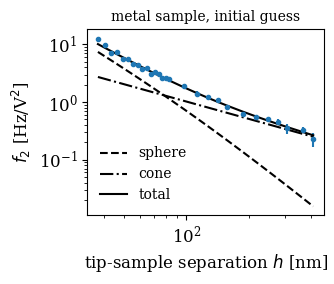

In [54]:
figs['03'] = plotfitf2parts(data, calcf2guess, 'initial guess')

# Compare measured $f_2$ to numerical model

## Compare Hoepker's and Marohn's $C_2$ at one height

Compare Marohn's numerical computation of the sphere plus cone capacitance second derivative $C_2$, computed using Xu's method, to Hoepker's analytical approximation of $C_2$.

Pick a height relatively close to the sample where the sphere and cone contributions to $C_2$ are both significant.  Pick the height by trial and error.  I find that setting the height equal to the radius is a good choice.

Using the Hoepker approximation, compute $C_2$ for the sphere and the cone contributions, and compute a total $C_2$.

In [20]:
params = {'height': ureg.Quantity(np.array([45.0]), 'nm'),
          'radius': ureg.Quantity(45.0, 'nm'),
          'theta': ureg.Quantity(20, 'degree')}

C2sphere, C2cone = C2SphereCone(**params)

(C2sphere, C2cone, C2sphere + C2cone)

(<Quantity([0.00088153], 'farad / meter ** 2')>,
 <Quantity([0.0004105], 'farad / meter ** 2')>,
 <Quantity([0.00129203], 'farad / meter ** 2')>)

Calculate the total capacitance in units of mF/m$^2$.  In these units the capacitance is of order 1.

In [21]:
C2_Hoepker = (C2sphere + C2cone)[0].to('mF/m^2').magnitude
C2_Hoepker

1.2920253187202846

Now compute $C_2$ using Marohn's numerical computation.  Here we have to pick a cone height.  To start, pick $4.5 \: \mu\mathrm{m}$, which is 100 times the tip-sample separation and radius.

In [22]:
from dissipationtheory.capacitancefinite import twodimCobject

In [23]:
obj = twodimCobject()

In [24]:
params = {'r': ureg.Quantity(45.0, 'nm'),
          'h': ureg.Quantity(45.0, 'nm'),
          'L': ureg.Quantity(4500.0, 'nm'), 
          'theta': 20}

In [25]:
obj.addtip(**params)
obj.response_metal()
obj.solve()

Express the total capacitance in units of mF/m$^2$.  

In [26]:
C2_Marohn = obj.results['C2'].to('mF/m^2').magnitude
C2_Marohn

1.2973085764153711

Taking Hoepker as the ground truth, the percentage difference between Hoepker's and Marohn's result is

In [27]:
100 * (C2_Hoepker - C2_Marohn)/C2_Hoepker

-0.40891286095844087

So the two results agree to within 0.4%.  Pretty good!

## Compare Hoepker's and Marohn's $C_2$ over many heights

Hoepker computation:

In [28]:
%%time
params = {'height': ureg.Quantity(data['h [nm]'].values, 'nm'),
          'radius': ureg.Quantity(45.0, 'nm'),
          'theta': ureg.Quantity(20, 'degree')}

C2sphere, C2cone = C2SphereCone(**params)
C2_Hoepker = (C2sphere + C2cone).to('mF/m^2').magnitude

CPU times: user 30.7 ms, sys: 7.62 ms, total: 38.3 ms
Wall time: 40.4 ms


In [29]:
C2_Hoepker

array([1.83117567, 1.57938163, 1.37795245, 1.21428833, 1.07949312,
       0.96714147, 0.87249935, 0.79201702, 0.72299075, 0.66333215,
       0.61140758, 0.56592439, 0.52584909, 0.49034741, 0.45874   ,
       0.43046921, 0.32542952, 0.25862755, 0.21320341, 0.18069363,
       0.15646853, 0.12307487, 0.1013337 , 0.0861357 , 0.07494058,
       0.06635875, 0.05406938, 0.04790758])

Marohn computation:

In [30]:
%%time
C2_Marohn = np.zeros_like(data['h [nm]'].values)
for index, h in enumerate(ureg.Quantity(data['h [nm]'].values, 'nm')):

    obj = twodimCobject()
    params = {'r': ureg.Quantity(45.0, 'nm'),
              'h': h,
              'L': ureg.Quantity(4500.0, 'nm'), 
              'theta': 20}

    obj.addtip(**params)
    obj.response_metal()
    obj.solve()

    C2_Marohn[index] = obj.results['C2'].to('mF/m^2').magnitude

CPU times: user 264 ms, sys: 23.3 ms, total: 288 ms
Wall time: 339 ms


In [31]:
C2_Marohn

array([1.8095661 , 1.57075948, 1.37921435, 1.22384433, 1.09479796,
       0.98679664, 0.89613482, 0.81807121, 0.75078413, 0.69232481,
       0.64186096, 0.59681941, 0.55691022, 0.5220031 , 0.4901791 ,
       0.46155068, 0.35468715, 0.28463504, 0.2359309 , 0.20039472,
       0.17347842, 0.135686  , 0.11063734, 0.0929466 , 0.07985458,
       0.06981382, 0.05522227, 0.04793065])

Helpful plotting function:

In [32]:
def plotcomparetwo(x, opts0, y1, opts1, label1, y2, opts2, label2, xaxislabel, yaxislabel):
    """Compare two data sets having a common x-axis.  Display the two
    data sets and plot their percentage difference, taking y1 as the
    ground truth."""
    
    fig, (ax1, ax2) = plt.subplots(2, 1,
        figsize=(3.5, 3.5),
        sharex=True, 
        gridspec_kw={'height_ratios': [1, 3]}) 
        
    ax1.scatter(x, 100*(y2-y1)/y1, **opts0)
    ax2.plot(x, y1, **opts1, label=label1)
    ax2.plot(x, y2, **opts2, label=label2)
    
    ax1.set_ylabel('% diff.')
    ax2.set_ylabel(yaxislabel)
    ax2.set_xlabel(xaxislabel)
    
    plt.legend(fontsize=9, frameon=False)
               
    plt.xscale('log')
    plt.yscale('log')
    
    fig.align_ylabels()
    fig.tight_layout()

    return fig

Compare Hoepker's and Marohn's $C_2$.  They agree within a few percent at small tip-sample separation. The largest disagreement occurs near $h \sim 200 \: \mathrm{nm}$, where Marohn's $C_2$ is approximately 10% larger than Hoepker's.  

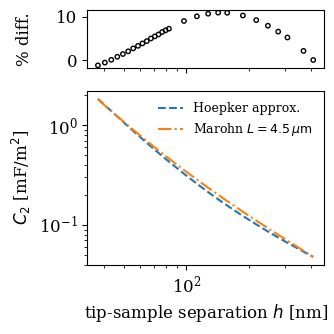

In [33]:
opts0 = {'marker': 'o', 'facecolors': 'none', 'edgecolors': 'black', 's': 10}
opts1 = {'linestyle': '--'}
opts2 = {'linestyle': '-.'}

figs['04'] = plotcomparetwo(
    data['h [nm]'].values, opts0,
    C2_Hoepker, opts1, 'Hoepker approx.',
    C2_Marohn, opts2, 'Marohn $L = 4.5 \: \mu\mathrm{m}$',
    'tip-sample separation $h$ [nm]',
    '$C_2$ [mF/m$^2$]')

We consider the 10% agreement to be pretty good.  

Hoepker's $C_2$ is an approximation valid at small $h$; since higher terms in the expansion are not reported, it is difficult to assess the range of validity of his approximate $C_2$.  Ideally there should be a correction term that accounts for finite cone length.  By retaining only the first term in an expansion, Hoepker's formula implictly assumes $L \rightarrow \infty$ for the length of the cone. 

Marohn's $C_2$ calculation represents the sphere and cone as a collection of image charges located along the $z$ axis, and assumes finite $L$.  Benchmark computations of $C_2$ for a sphere over a ground plane, using 21 image charges placed inside the sphere, showed numerical results agreeing with the analytical $C_2$, computed using 21 terms, to within better than a part per million down to $h/r = 0.5$.  So Marohn's method is in principle very accurate.  However, Marohn's $C_2$ computation assumes a finite $L$, and for this reason is not expected to reproduce Hoepker's result at large $h$.  

## Compare measured $f_2$ to Marohn's numerical model

Recompute the capacitance second derivative, now with units.

In [131]:
params = {'r': ureg.Quantity(45.0, 'nm'),
          'h': ureg.Quantity(45.0, 'nm'),
          'L': ureg.Quantity(4500.0, 'nm'), 
          'theta': 20}

C2_Marohn =ureg.Quantity(np.zeros_like(data['h [nm]'].values), 'mF/m^2')
for index, h in enumerate(ureg.Quantity(data['h [nm]'].values, 'nm')):

    obj = twodimCobject()
    params['h'] = h
    obj.addtip(**params)
    obj.response_metal()
    obj.solve()

    C2_Marohn[index] = obj.results['C2'].to('mF/m^2')

Compute the frequency coefficient $f_2$ from $C_2$ using

\begin{equation}
  f_2 = -\frac{f_\mathrm{c}}{4 k_\mathrm{c}} C_2
\end{equation}

Make the frequency shift positive to agree with experiment.

In [132]:
fc = cantilever['f_0']
kc = cantilever['k_0']

f2_Marohn = ((fc * C2_Marohn)/(4 * kc)).to('Hz/(V^2)').magnitude

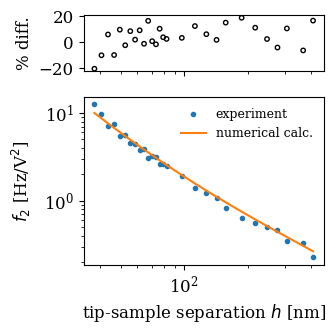

In [133]:
opts0 = {'marker': 'o', 'facecolors': 'none', 'edgecolors': 'black', 's': 10}
opts1 = {'linestyle': '', 'marker': '.'}
opts2 = {'linestyle': '-'}

figs['05'] = plotcomparetwo(
    data['h [nm]'].values, opts0,
    data['f2 [Hz/V^2]'].values, opts1, 'experiment',
    f2_Marohn, opts2, 'numerical calc.',
    'tip-sample separation $h$ [nm]',
    '$f_2$ [Hz/V$^2$]')

Print out the parameters used in the numerical calculation.

In [134]:
print('     sphere radis =', params['r'], 
      '\n    cone length =', params['L'],
      '\ncone half angle =', params['theta'], 'degrees')


     sphere radis = 45.0 nanometer 
    cone length = 4500.0 nanometer 
cone half angle = 20 degrees


# Curve fit to numerical model

In [135]:
from lmfit import Model, Parameters

Define a fit function.  Fix the cone length, let the radius and cone half angle be fit parameters.

In [215]:
def f2numerical(height, radius, theta):

    params = {'r': ureg.Quantity(radius, 'nm'),
              'h': ureg.Quantity(radius, 'nm'),  # placeholder
              'L': ureg.Quantity(4500.0, 'nm'),  # hardwired
              'theta': theta}

    obj = twodimCobject()
    
    C2_Marohn =ureg.Quantity(np.zeros_like(height), 'mF/m^2')
    for index, h in enumerate(ureg.Quantity(height, 'nm')):

        params['h'] = h
        obj.addtip(**params)
        obj.response_metal()
        obj.solve()

        C2_Marohn[index] = obj.results['C2'].to('mF/m^2')
    
    f2_Marohn = ((cantilever['f_0'] * C2_Marohn)/
                 (4 * cantilever['k_0'])).to('Hz/(V^2)').magnitude
    
    return f2_Marohn

Test drive the function.

In [222]:
x = data['h [nm]'].values
y = data['f2 [Hz/V^2]'].values
dy = data['stdev f2 [Hz/V^2]'].values

f2numerical(x,35,5)

array([6.72775773, 5.76284002, 5.00034824, 4.39090192, 3.88392835,
       3.45864671, 3.10476495, 2.81042993, 2.55336956, 2.33156527,
       2.13611072, 1.96754624, 1.82387625, 1.69256897, 1.57576169,
       1.46960591, 1.08522006, 0.84270358, 0.67807404, 0.55927451,
       0.47310342, 0.35549558, 0.27934288, 0.22769492, 0.18971844,
       0.16307152, 0.11073448, 0.29750329])

Set up the fit model and initialize the best-fit parameters.

In [138]:
gmodel = Model(f2numerical)

In [223]:
pars = Parameters()
pars.add('radius', value=35.0, min=30., max=100., vary=True)
pars.add('theta', value=15.0, min=10., max=45., vary=True)

Fit with weights. 

Multiply the standard deviation of the data points by a (fudge) factor of 4 so that $\chi^2_\mathrm{red} \sim 1$.

I have tried a number of fitting methods.  These fitting methods fail:

- 'leastsq' (default)
- 'least_squares'

By "fail", I mean that the best-fit line does not go through the data and the fit returns best-fit values very near the starting values.  Also, the fit terminates in just a few seconds, suspiciously quickly.

These fitting methods apparently succeed:

- 'differential_evolution'
- 'brute'
- 'cg'


By "succeed", I mean the fit looks good and returns best-fit values quite different from the staring values.  The fit can now take 10's of second to minutes to complete however.  And none of the above methods, applied to our problem, return error bars for the best-fit parameters!  See the documentation [here](https://lmfit.github.io/lmfit-py/fitting.html) for the `lmfit.minimize` function see for [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for `scipy.optimize.minimize`.

Some observations from running the curve fit with various settings.

* It is important to fit with weights.  The cone angle is determined primarily by the data at large $h$.  You need to fit with weights so that the data at large $h$ contributes significantly to the $\chi^2$. 

* The numerical calculation gives nonsense results for $r \leq 35$ nm.

* The fit does not converge unless you pick the right method.

In [262]:
%%time
result = gmodel.fit(y, params=pars, height=x, weights=1/(4 * dy),
    scale_covar=False,
    method='brute')

CPU times: user 1min 24s, sys: 7.49 s, total: 1min 31s
Wall time: 1min 14s


Plot the best-fit $f_2$ and compare it to the measured $f_2$.

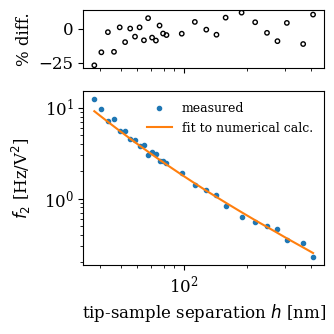

In [265]:
ycalc = f2numerical(x, 
    result.params['radius'].value,
    result.params['theta'].value)

opts0 = {'marker': 'o', 'facecolors': 'none', 'edgecolors': 'black', 's': 10}
opts1 = {'linestyle': '', 'marker': '.'}
opts2 = {'linestyle': '-'}

figs['06'] = plotcomparetwo(
    x, opts0,
    y, opts1, 'measured',
    ycalc, opts2, 'fit to numerical calc.',
    'tip-sample separation $h$ [nm]',
    '$f_2$ [Hz/V$^2$]')

Print out fit results.

In [266]:
result

# Conclusions

Comparing measured $f_2$ *vs*. $h$ data over gold to the models discussed above, we conclude that 

1. modeling the tip as a sphere *does not* fit the data;
2. modeling the tip as a sphere plus a cone *does* fit the data;
3. Hoepker's analytical cone-plus-sphere model and Marohn's numerical cone-plus-sphere model yield a similar $C_2$; and
4. we can obtain best-fit values for the tip radius and cone half angle using Marohn's numerical cone-plus-sphere model and least-squares minimization in 1 to 2 minutes.

In summary, a cone-plus-sphere tip model is required to fit  $f_2$ *vs*. $h$ data over a metal; a sphere-only model is inadequate.  Being able to fit $f_2$ *vs*. $h$ to Marohn's numerical model of a sphere-plus-cone tip over a metal sample is a significant finding, because this model an be extended to a semiconductor sample.

# Save all figures

In [57]:
if 1:
    for num in figs.keys():
        figname = THIS + "Fig-" + num
        figs[num].tight_layout()
        figs[num].savefig(figname + '.png', dpi=300)
        figs[num].savefig(figname + '.pdf')